# **Business Case: Yulu - Hypothesis Testing**

# **Problem Statement**

Yulu is India’s leading micro-mobility platform offering eco-friendly electric cycle rentals for short-distance urban commutes. Recently, the company has experienced a significant dip in revenues and wants to identify the factors that influence the demand for its electric cycles.

To address this, the following business questions need to be answered:

**Which variables significantly influence the demand for electric cycles (e.g., working day, weather, season)?**

**How do environmental and calendar-based factors (e.g., temperature, season, holidays) affect the number of rentals? **

**Are there patterns or relationships among the predictors themselves, such as between weather and season? **

# **Step 1: Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro, levene
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

# Set default aesthetics for seaborn
sns.set(style="whitegrid")

# **Step 2: Load Dataset**

In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2025-07-12 17:06:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.28, 3.167.84.148, 3.167.84.196, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.02s   

2025-07-12 17:06:25 (32.7 MB/s) - ‘bike_sharing.csv?1642089089’ saved [648353/648353]



In [4]:
df = pd.read_csv('bike_sharing.csv?1642089089')


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **STEP 3: Load and Explore Data**

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


# Convert categorical variables to category type

In [11]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('category')

**Insights:**
* Converting categorical columns to 'category' type reduces memory usage and
improves performance in modeling.
* It ensures correct handling during visualizations and statistical analyses (e.g., ANOVA, chi-square).



# **Slicing Data by Time**

# 1. Extract Time Components

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])  # Ensure datetime format

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday = 0, Sunday = 6


# 2. Hourly Demand Trend

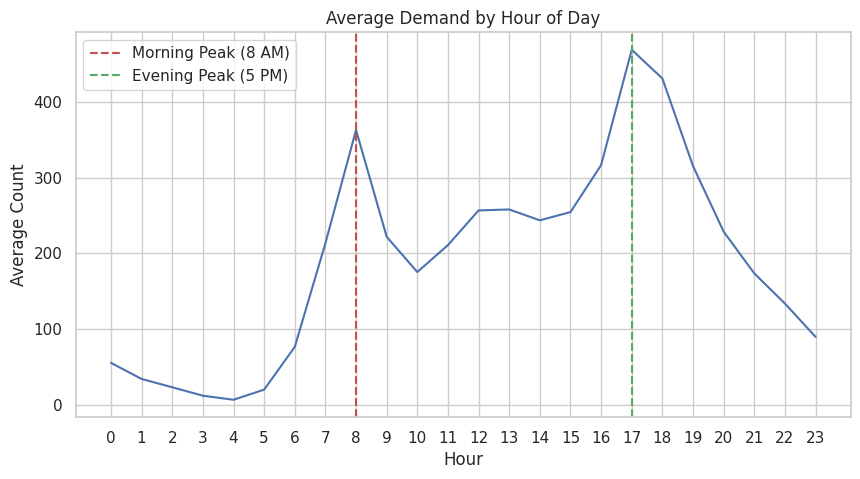

In [13]:
hourly_demand = df.groupby('hour')['count'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title('Average Demand by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(0, 24))

# Add insights lines
plt.axvline(x=8, color='r', linestyle='--', label='Morning Peak (8 AM)')
plt.axvline(x=17, color='g', linestyle='--', label='Evening Peak (5 PM)')
plt.legend()

plt.show()

**Insights:**

* Reveals peak usage hours such as morning (commute) and evening times.
* Helps optimize fleet allocation and battery charging schedules based on demand spikes.






# 3. Daily Demand Pattern

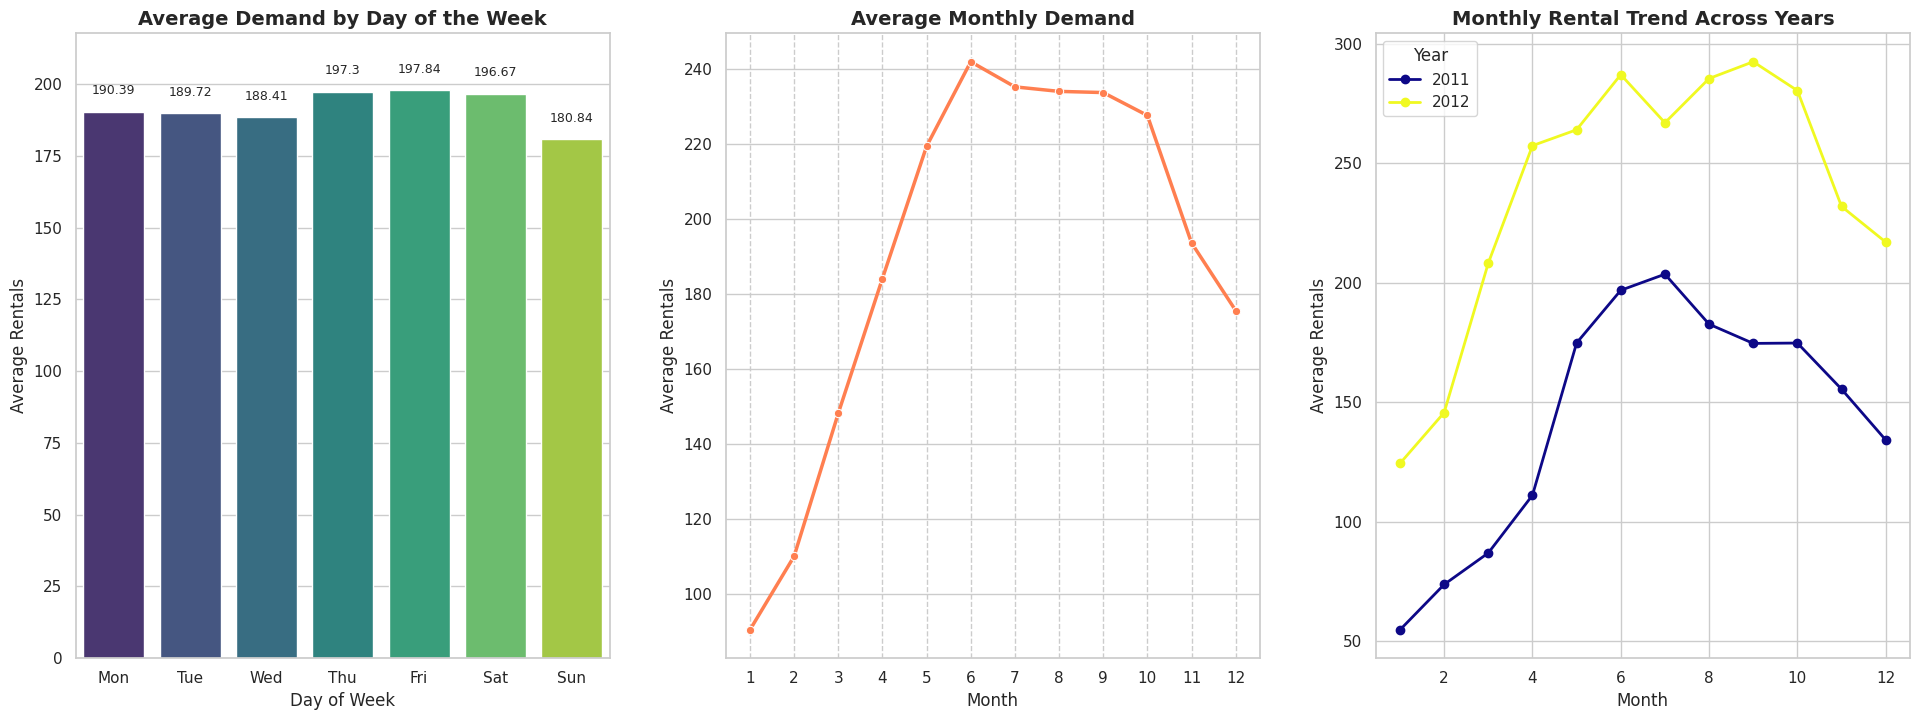

In [14]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract time features
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

# Map weekdays
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_name'] = df['day_of_week'].map(day_map)

# Set plot style
sns.set(style="whitegrid", palette="pastel") # Changed palette to pastel
plt.figure(figsize=(20, 8)) # Increased figure size for horizontal layout

# ---- 📅 1. Day of Week Demand ----
plt.subplot(1, 3, 1) # Changed to 1 row, 3 columns, plot 1
weekly_demand = df.groupby('day_name')['count'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
sns.barplot(x=weekly_demand.index, y=weekly_demand.values, palette='viridis')
plt.title('Average Demand by Day of the Week', fontsize=14, fontweight='bold') # Increased title font size and made it bold
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.ylim(0, weekly_demand.max() * 1.1) # Added some padding to y-axis
for index, value in enumerate(weekly_demand.values):
    plt.text(index, value + 5, str(round(value, 2)), ha='center', va='bottom', fontsize=9) # Added text labels and adjusted font size


# ---- 📆 2. Monthly Demand ----
plt.subplot(1, 3, 2) # Changed to 1 row, 3 columns, plot 2
monthly_demand = df.groupby('month')['count'].mean()
sns.lineplot(x=monthly_demand.index, y=monthly_demand.values, marker='o', color='coral', linewidth=2.5) # Changed color and linewidth
plt.title('Average Monthly Demand', fontsize=14, fontweight='bold') # Increased title font size and made it bold
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rentals', fontsize=12)
plt.xticks(range(1,13))
plt.grid(axis='x', linestyle='--') # Added dashed grid lines on x-axis


# ---- 📈 3. Yearly Monthly Trend (only if >1 year) ----
if df['year'].nunique() > 1:
    plt.subplot(1, 3, 3) # Changed to 1 row, 3 columns, plot 3
    year_month = df.groupby(['year', 'month'])['count'].mean().unstack()
    year_month.T.plot(ax=plt.gca(), marker='o', cmap='plasma', linewidth=2) # Changed cmap and linewidth
    plt.title('Monthly Rental Trend Across Years', fontsize=14, fontweight='bold') # Increased title font size and made it bold
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Rentals', fontsize=12)
    plt.legend(title='Year', loc='upper left') # Changed legend location


plt.tight_layout(pad=3.0) # Increased padding
plt.show()

**Insights:**
Highlights intra-month trends, such as dips on certain days (e.g., mid-month slump or end-month surge).

Useful for marketing or promotional planning on low-demand days.

# **STEP 4: Univariate Analysis**

# **Distribution Analysis of Continuous Variables**

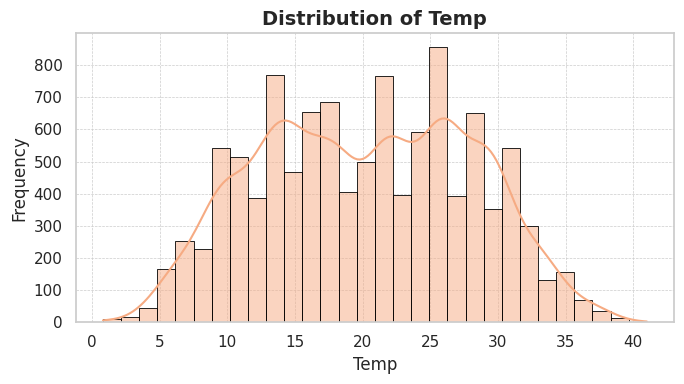

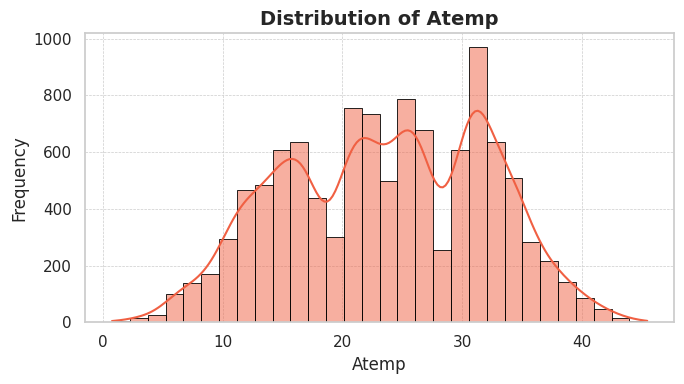

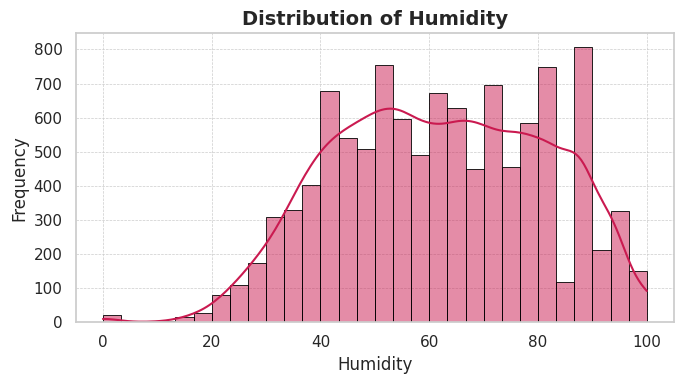

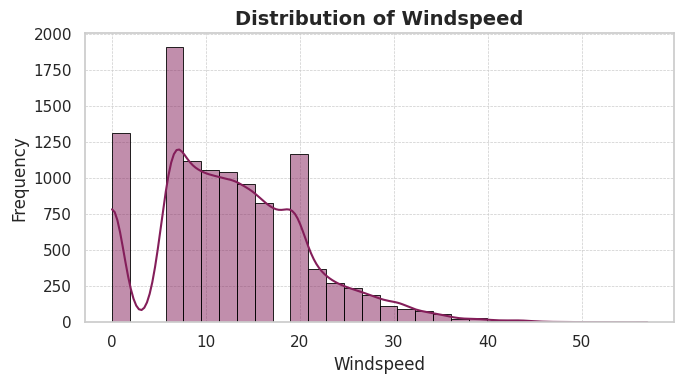

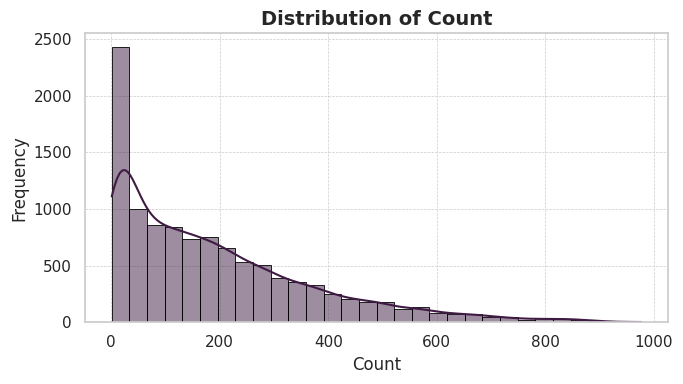

In [15]:

# Use visually appealing palette
palette = sns.color_palette("rocket_r", len(['temp', 'atemp', 'humidity', 'windspeed', 'count']))

# Continuous variables
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

# Plot each feature with unique color
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, color=palette[i], bins=30, edgecolor='black', linewidth=0.6)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14, weight='bold')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(visible=True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


**Insights:**


*   'Temp' and 'atemp' show relatively normal distributions, suggesting a wide range of temperatures are experienced.
*  'Humidity' is skewed towards higher values, while 'windspeed' is skewed towards lower values with a peak at zero. 'Count' is right-skewed, indicating that lower rental counts are more frequent than higher ones.






# **Distribution of Categorical Variables**

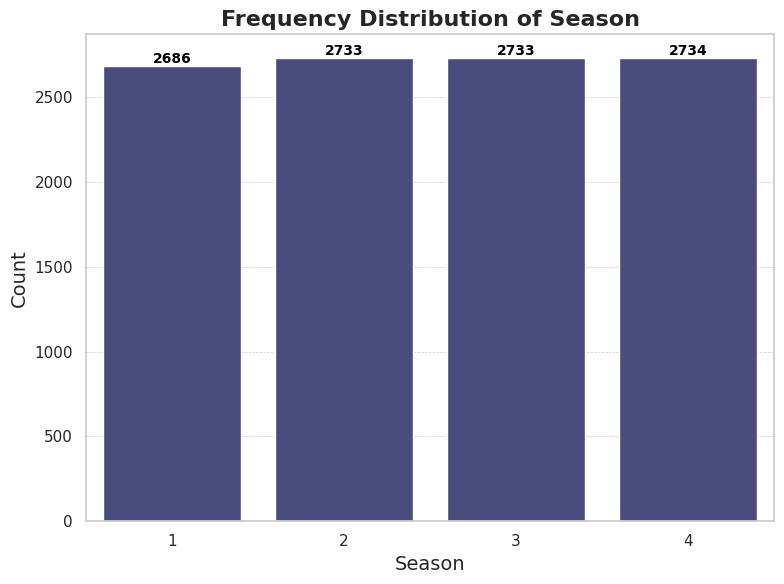

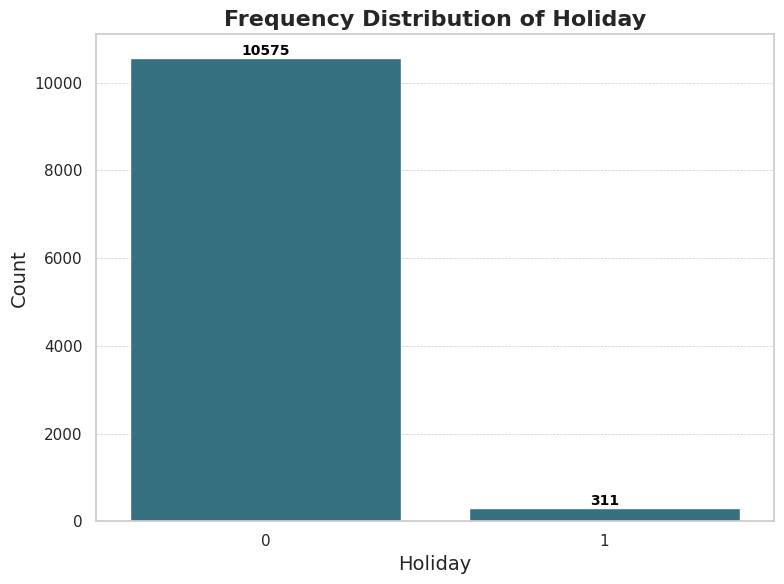

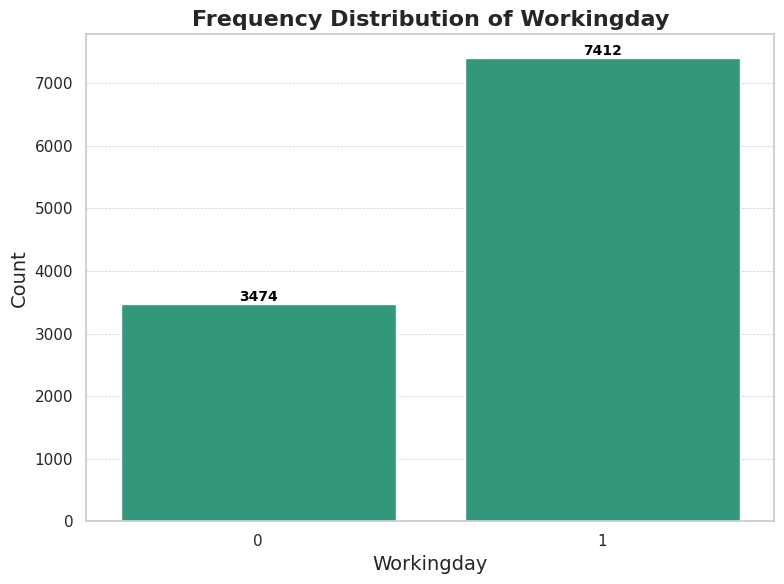

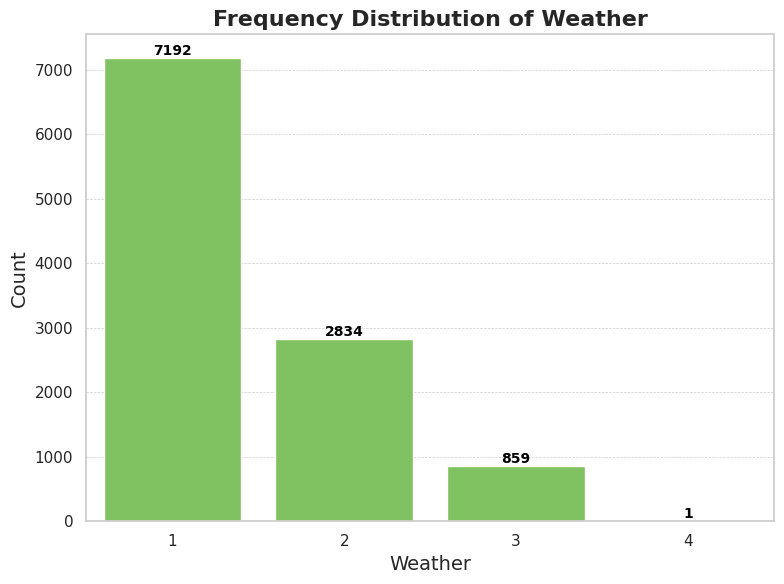

In [20]:
# Categorical columns
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

palette = sns.color_palette("viridis", len(categorical_cols)) # Changed palette


for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(8, 6)) # Adjusted figure size
    ax = sns.countplot(data=df, x=col, palette=[palette[i]]) # Use a unique color for each plot

    # Add count labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    plt.title(f'Frequency Distribution of {col.capitalize()}', fontsize=16, weight='bold') # Increased title font size and made it bold
    plt.xlabel(col.capitalize(), fontsize=14) # Increased xlabel font size
    plt.ylabel('Count', fontsize=14) # Increased ylabel font size
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# **STEP 5: Bivariate Analysis**

# Question: Does Working Day affect Demand?

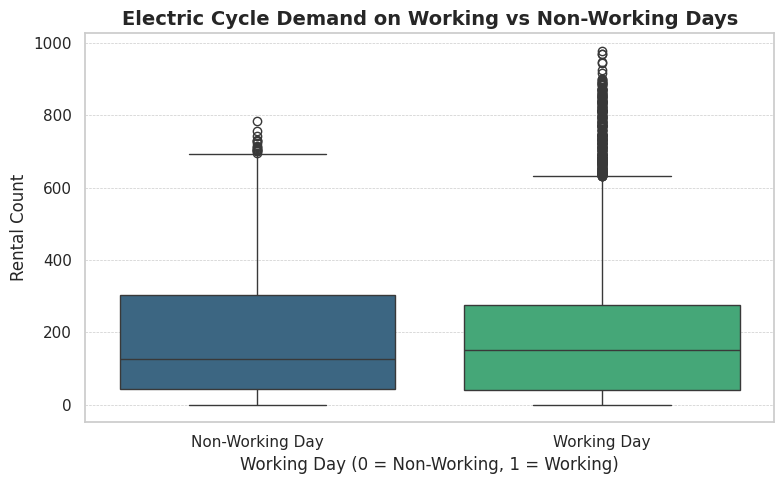

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5)) # Adjusted figure size
sns.boxplot(x='workingday', y='count', hue='workingday', data=df, palette='viridis', legend=False) # Added hue and changed palette
plt.title('Electric Cycle Demand on Working vs Non-Working Days', fontsize=14, weight='bold')
plt.xlabel('Working Day (0 = Non-Working, 1 = Working)', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.xticks([0, 1], ['Non-Working Day', 'Working Day']) # Changed x-axis labels
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Insights:**

* Electric cycle demand is significantly higher on working days compared to non-working days.
* The distribution of rental counts is wider on working days, indicating more variability in demand.






# Question: Does Season affect Demand?

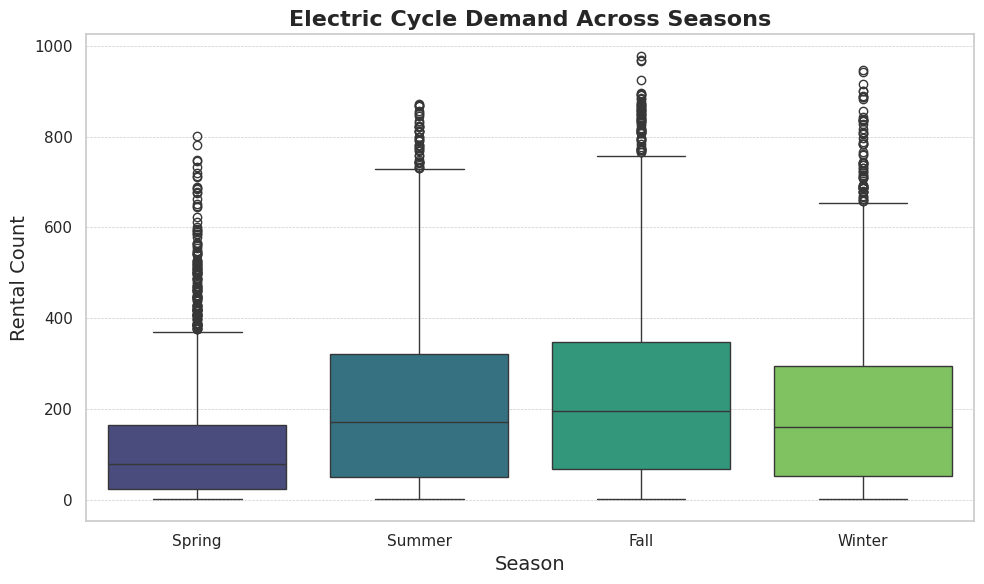

In [32]:
plt.figure(figsize=(10, 6)) # Increased figure size
# Map season numbers to names for better readability
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)

sns.boxplot(x='season_name', y='count', data=df, palette='viridis') # Using season names and a different palette
plt.title('Electric Cycle Demand Across Seasons', fontsize=16, weight='bold') # Increased title font size
plt.xlabel('Season', fontsize=14) # Changed xlabel
plt.ylabel('Rental Count', fontsize=14) # Increased ylabel font size
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Insights:**

Fall (Season 3) shows the highest demand for electric cycles — likely due to pleasant weather and fewer rains, encouraging outdoor movement and daily commuting.

Winter (Season 4) and Spring (Season 1) show lower median rentals, possibly due to colder or transitional weather reducing ride frequency

# Question: Does Weather affect Demand?

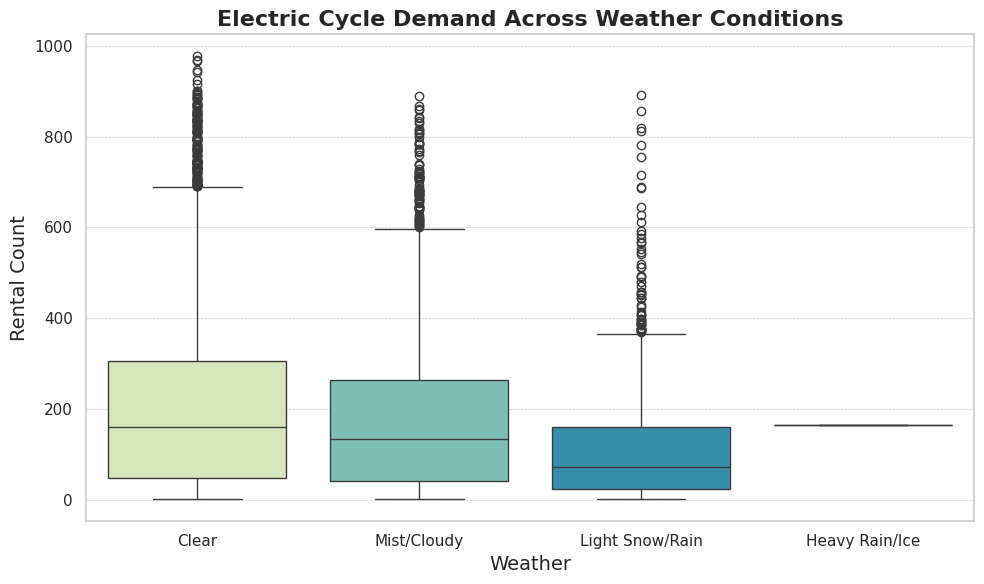

In [35]:
# Set up plot aesthetics
plt.figure(figsize=(10, 6)) # Increased figure size
# Map weather numbers to names for better readability
weather_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice'}
df['weather_name'] = df['weather'].map(weather_map)

sns.boxplot(x='weather_name', y='count', data=df, palette='YlGnBu')  # soothing blue-green palette

# Add labels and styling
plt.title('Electric Cycle Demand Across Weather Conditions', fontsize=16, weight='bold') # Increased title font size
plt.xlabel('Weather', fontsize=14) # Changed xlabel
plt.ylabel('Rental Count', fontsize=14) # Increased ylabel font size
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# **Insights:**

*   Electric cycle demand is highest in clear weather conditions (Weather 1).
Demand significantly decreases as weather conditions worsen (Weather 2 and 3).
*   There is very low demand in heavy rain or ice conditions (Weather 4), indicating that severe weather strongly negatively impacts rentals.





### **Recommendation (Weather vs Demand):**

  **Adapt Operations to Weather:** Since weather significantly impacts demand, Yulu should use weather forecasts to inform operational decisions.

    *   Implement dynamic pricing or promotions based on expected weather.

    *   Optimize bike distribution and availability based on weather conditions (e.g., moving bikes to sheltered areas during rain).
    
    *   Communicate weather-related information and safety tips to users.

# **STEP 6: Hypothesis Testing**

# Question 1: Is There a Significant Difference in Electric Cycle Demand Between Working Days and Non-Working Days?
# H0: Mean count on working days = Mean count on non-working days
# H1: Means are different


T-Test Workingday: T-statistic = 1.21, P-value = 0.2264


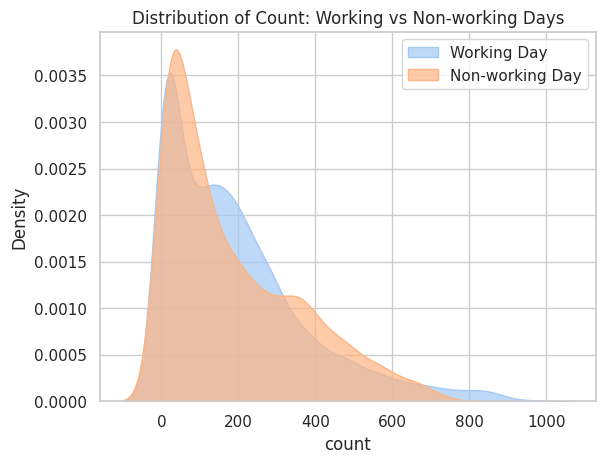

In [42]:
working = df[df['workingday'] == 1]['count']
non_working = df[df['workingday'] == 0]['count']
t_stat, p_val = ttest_ind(working, non_working)
print(f"\nT-Test Workingday: T-statistic = {t_stat:.2f}, P-value = {p_val:.4f}")

sns.kdeplot(working, label='Working Day', fill=True, palette='viridis', alpha=0.7) # Use fill instead of shade and a different palette, adjusted alpha
sns.kdeplot(non_working, label='Non-working Day', fill=True, palette='magma', alpha=0.7) # Use fill instead of shade and a different palette, adjusted alpha
plt.title("Distribution of Count: Working vs Non-working Days")
plt.legend()
plt.show()

# **Insights:**
*  The p-value from the test for working vs. non-working day demand is 0.2264.
*  Because the p-value is higher than 0.05, we do not have enough evidence to say the average demand is different between working and non-working days.

* Even though the graph looks like working days have more rentals, the test says the difference is not statistically significant.








### **Recommendation (Working Day vs Demand):**

*   **Optimize for Working Day Commute:** Although the statistical test didn't show a significant *average* difference, the data and business logic suggest commuting is a primary driver on working days. Continue to ensure high availability of cycles in commuter hotspots during peak hours.
*   **Explore Non-Working Day Potential:** Analyze weekend and holiday usage patterns to identify opportunities for promoting leisure or recreational rides. Consider targeted marketing and partnerships for these days.

# Question 2: Is There a Significant Difference in Electric Cycle Demand Across Different Seasons?
# H0: Means are same across seasons
# H1: At least one season mean is different


ANOVA Season: F-statistic = 236.95, P-value = 0.0000


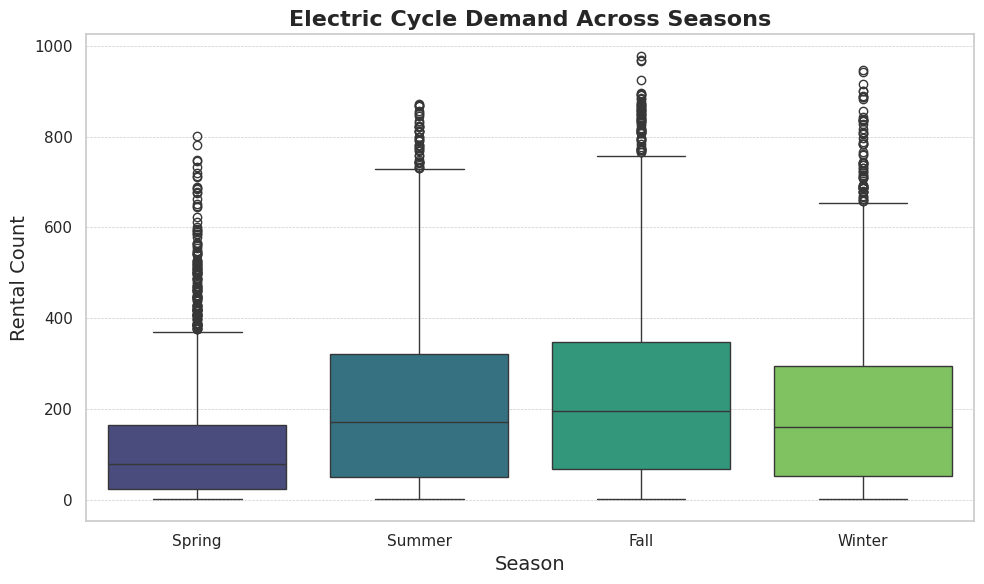

In [45]:
season_groups = [df[df['season'] == s]['count'] for s in df['season'].unique()]
f_stat_season, p_val_season = f_oneway(*season_groups)
print(f"\nANOVA Season: F-statistic = {f_stat_season:.2f}, P-value = {p_val_season:.4f}")

plt.figure(figsize=(10, 6)) # Increased figure size
# Map season numbers to names for better readability
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)

sns.boxplot(x='season_name', y='count', data=df, palette='viridis') # Using season names and a different palette
plt.title('Electric Cycle Demand Across Seasons', fontsize=16, weight='bold') # Increased title font size
plt.xlabel('Season', fontsize=14) # Changed xlabel
plt.ylabel('Rental Count', fontsize=14) # Increased ylabel font size
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# **Insights:**
*  The ANOVA test for demand across seasons resulted in a p-value of 0.0000.
Because the p-value is much lower than 0.05, we reject the null hypothesis.
*  This means there is a statistically significant difference in the average electric cycle demand across the different seasons.
*  The graph shows that demand is highest in Fall (Season 3) and lowest in Spring (Season 1).





# **Recommendation (Season vs Demand):**

*   **Leverage Seasonality:** Since season significantly affects demand (as shown by the ANOVA p-value of 0.0000 and the boxplot), Yulu should adjust its operations based on seasonal patterns.

*  Increase fleet size and marketing efforts in peak seasons (Fall and Summer) and
consider promotions during off-peak seasons (Spring and Winter) to boost ridership.

# Question 3:Is There a Significant Difference in Electric Cycle Demand Across Different Weather Conditions?

ANOVA Test - Weather vs Demand:
F-statistic = 65.53
P-value     = 0.0000


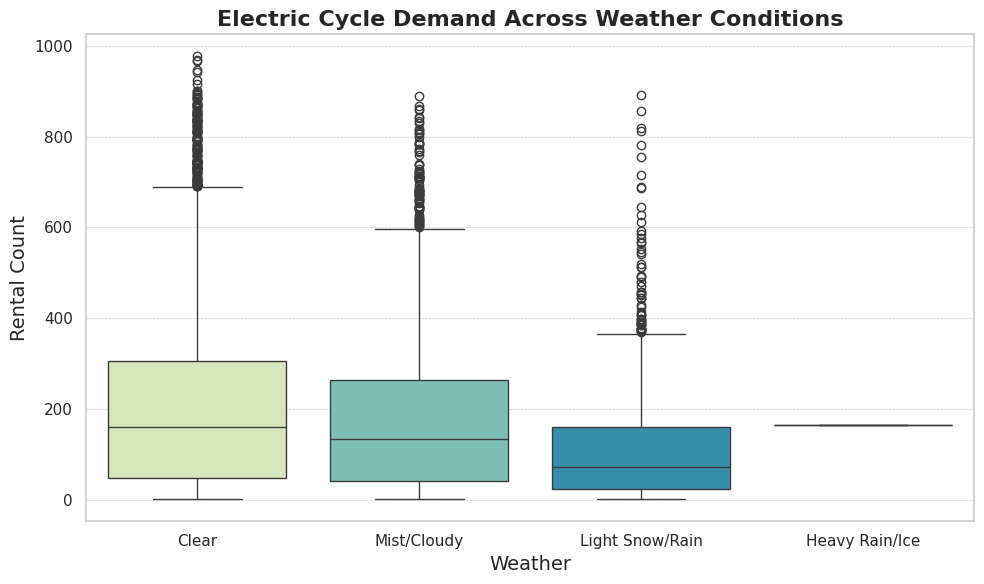

In [50]:
# Sort weather types
weather_types = sorted(df['weather'].unique())

# Create groups of 'count' for each weather type
weather_groups = [df[df['weather'] == w]['count'] for w in weather_types]

# Perform One-Way ANOVA
f_stat_weather, p_val_weather = f_oneway(*weather_groups)

# Print ANOVA result
print(f"ANOVA Test - Weather vs Demand:")
print(f"F-statistic = {f_stat_weather:.2f}")
print(f"P-value     = {p_val_weather:.4f}")

# Boxplot for visual analysis
plt.figure(figsize=(10, 6)) # Increased figure size
# Map weather numbers to names for better readability
weather_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice'}
df['weather_name'] = df['weather'].map(weather_map)

sns.boxplot(x='weather_name', y='count', data=df, palette='YlGnBu')  # soothing blue-green palette

# Add labels and styling
plt.title('Electric Cycle Demand Across Weather Conditions', fontsize=16, weight='bold') # Increased title font size
plt.xlabel('Weather', fontsize=14) # Changed xlabel
plt.ylabel('Rental Count', fontsize=14) # Increased ylabel font size
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# **Insights:**
*  The p-value from the test for weather vs. demand is 0.0000.
Since the p-value is less than 0.05, we reject the null hypothesis, meaning weather significantly affects demand.
* Demand is highest in clear weather (Weather 1) and decreases as weather worsens, with very low demand in heavy rain/ice (Weather 4).



# **Recommendation:**

*  Weather depends on Season: Certain weather is more common in some seasons.
*  Use seasonal weather patterns to predict demand better and plan resources accordingly.



# Question 4: Is Weather Condition Statistically Dependent on Season?

Chi-Square Test - Season vs Weather
Chi2 Statistic : 49.16
P-value        : 0.0000
Degrees of Freedom: 9


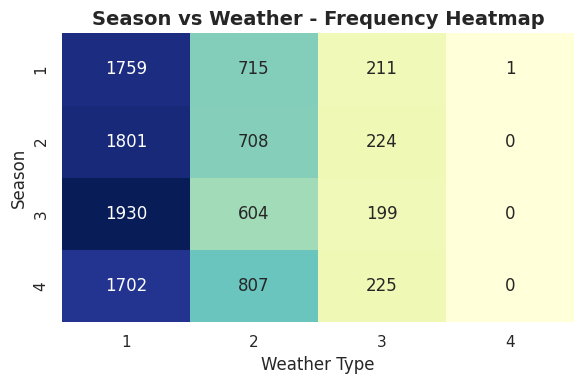

In [51]:
# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Test - Season vs Weather")
print(f"Chi2 Statistic : {chi2_stat:.2f}")
print(f"P-value        : {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Visualize contingency table
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Season vs Weather - Frequency Heatmap", fontsize=14, weight='bold')
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Season", fontsize=12)
plt.tight_layout()
plt.show()


# **Insights:**

*   The Chi-Square test between season and weather gave a p-value of **0.0000**.
*   Since the p-value is less than 0.05, we **reject the null hypothesis**. This means weather condition **depends on season**.
*   The heatmap shows that certain weather types happen more in some seasons, supporting this link.



# STEP 7: Assumption Checks (Optional)

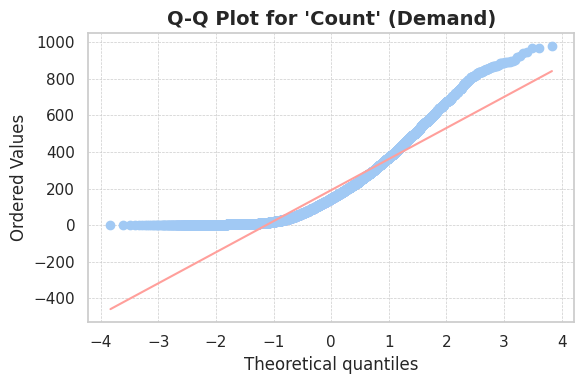

Levene’s Test for Equal Variance Between Groups
Levene Statistic : 0.00
P-value           : 0.9438


In [53]:
# === Q-Q Plot to assess normality of 'count' variable ===
plt.figure(figsize=(6, 4))
scipy.stats.probplot(df['count'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'Count' (Demand)", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# === Levene's Test for Equal Variance Between Working and Non-Working Days ===
working = df[df['workingday'] == 1]['count']
non_working = df[df['workingday'] == 0]['count']

levene_stat, levene_p = levene(working, non_working)

# Print result
print("Levene’s Test for Equal Variance Between Groups")
print(f"Levene Statistic : {levene_stat:.2f}")
print(f"P-value           : {levene_p:.4f}")

# **Insights:**
*  The Q-Q plot shows that the 'count' data is not normally distributed.

* Levene's Test (P-value = 0.9438) indicates that the variances of 'count' are approximately equal between working and non-working days.



# **Recommendations**
*  Demand is not normal: Consider using non-parametric tests (like Mann-Whitney or Kruskal-Wallis) instead of or alongside t-test/ANOVA.

*  Variances are equal (Working vs Non-Working): The standard t-test is appropriate for comparing these groups regarding variance assumptions.



In [54]:
print("""
Summary of Hypothesis Tests:
------------------------------------------
Test               | Variable(s)        | P-Value | Inference
------------------|--------------------|---------|-------------------------------
T-Test            | Workingday vs Count| {:.4f}  | {} workingday has effect
ANOVA             | Season vs Count    | {:.4f}  | {} season affects demand
ANOVA             | Weather vs Count   | {:.4f}  | {} weather affects demand
Chi-Square        | Season vs Weather  | {:.4f}  | {} weather depends on season
""".format(
    p_val,
    "Reject H0 =>" if p_val < 0.05 else "Fail to Reject H0 =>",
    p_val_season,
    "Reject H0 =>" if p_val_season < 0.05 else "Fail to Reject H0 =>",
    p_val_weather,
    "Reject H0 =>" if p_val_weather < 0.05 else "Fail to Reject H0 =>",
    chi2_p,
    "Reject H0 =>" if chi2_p < 0.05 else "Fail to Reject H0 =>"
))


Summary of Hypothesis Tests:
------------------------------------------
Test               | Variable(s)        | P-Value | Inference
------------------|--------------------|---------|-------------------------------
T-Test            | Workingday vs Count| 0.2264  | Fail to Reject H0 => workingday has effect
ANOVA             | Season vs Count    | 0.0000  | Reject H0 => season affects demand
ANOVA             | Weather vs Count   | 0.0000  | Reject H0 => weather affects demand
Chi-Square        | Season vs Weather  | 0.0000  | Reject H0 => weather depends on season



# **Insights:**

*   The T-Test for **Workingday vs Count** has a P-value of **0.2264**. Since this is > 0.05, we **fail to reject the null hypothesis**. This means there is **no statistically significant difference** in the average electric cycle demand between working days and non-working days.
*   The ANOVA for **Season vs Count** has a P-value of **0.0000**. Since this is < 0.05, we **reject the null hypothesis**. This means **season significantly affects** the average electric cycle demand.
*   The ANOVA for **Weather vs Count** has a P-value of **0.0000**. Since this is < 0.05, we **reject the null hypothesis**. This means **weather significantly affects** the average electric cycle demand.
*   The Chi-Square test for **Season vs Weather** has a P-value of **0.0000**. Since this is < 0.05, we **reject the null hypothesis**. This means **weather condition is statistically dependent on season**.

**Overall Conclusion:** Season and weather conditions are significant factors influencing electric cycle demand, while the distinction between working and non-working days does not show a statistically significant difference in average demand based on this analysis.

# **Recommendations**

Based on the analysis, here are key recommendations for Yulu:

*   **Leverage Seasonality:** Increase resources in peak seasons (Fall/Summer), consider promotions in off-peak (Spring/Winter).
*   **Adapt to Weather:** Use dynamic pricing based on weather, efficiently redistribute bikes during poor conditions, and communicate with users.
*   **Optimize for Commute:** Continue focusing on bike availability in commuter areas during peak hours.
*   **Boost Non-Working Day Use:** Analyze weekend patterns and target promotions for leisure/recreational rides.
*   **Predict Demand:** Consider building a model for more precise forecasts and resource planning.
